In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# Культура работы с данными: лекция 5

## Байесианский подход к статистике

### Что такое вероятность?

##### В байесианской статистике вероятность - мера неопределенности

#### Игры, честные и не очень

Есть честная монетка. Если выпадает решка - вы проигрываете 10 рублей. Если выпадает орел - выигрываете 5. 

$$
    P(A|B) = \frac{P(B|A)P(A)} {\sum_i P(B|A_i)P(A_i)}
$$

Априорная (до-опытная) вероятность: 

$$
    P(A)
$$

Правдоподобие: 

$$
    P(B|A)
$$

Апостериорная вероятность: 

$$
    P(A|B)
$$

Предельное правдоподобие: 

$$
    P(B) = \sum_i P(B|A_i)P(A_i)
$$

### Общий подход байесианской статистики

##### Предварительные предположения об априорной вероятности

##### Уточнение вероятностей по теореме Байеса

##### Оценка моделей

##### Результат байесианского анализа - апостериорное распределение вероятностей

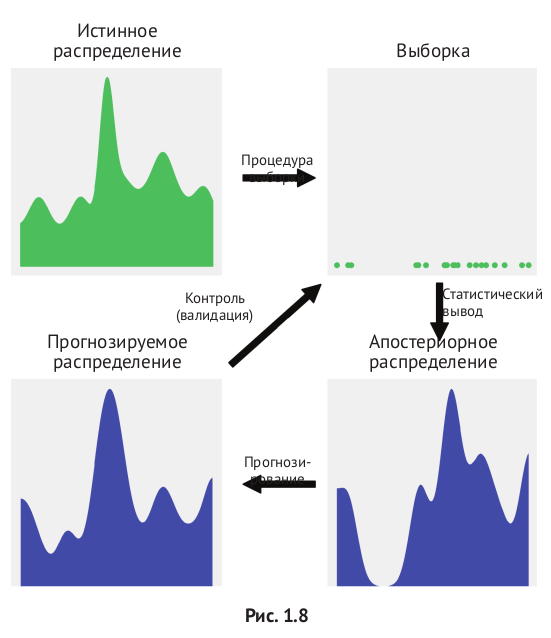

In [2]:
Image("flow.png")

### Разница между байесианским и фреквентистским подходом

Фреквентистский способ:

1. Делаем предположения о процессе, породившем данные и бесконечное количество их репликаций;
2. Пытаемся отвергнуть все предположения.

Байесианский способ:

1. Делаем предположения об априорной вероятности;
2. Получаем апостериорную вероятность по теореме Байеса.

### Пример классификации

$$
    P(class|data) = \frac{P(data|class) \times P(class)}{P(data)}
$$

Пусть у нас всего два класса, спам и хэм:
$$
    P(data) = P(data|ham)P(ham) + P(data|spam)P(spam)
$$

Рассмотрим вероятность получить спам: $$
    P(spam|data) = \frac{P(data|spam) \times P(spam)}{P(data)}
$$ и вероятность получить хэм: $$
    P(ham|data) = \frac{P(data|ham) \times P(ham)}{P(data)}
$$

Найдем отношение вероятностей:
$$
    \frac{P(spam|data)}{P(ham|data)} = \frac{P(data|spam) \times P(spam)\frac{1}{P(data)}}{P(data|ham) \times P(ham)\frac{1}{P(data)}}
$$

$$
    O(spam|data) = \frac{P(data|spam) \times P(spam)}{P(data|ham) \times P(ham)}
$$

$$
    O(class) = \frac{P(spam)}{P(ham)}
$$

$$
    O(spam|data) = \frac{P(data|spam)}{P(data|ham)}O(class)
$$

Нам нравится линейная формула: $$
    \hat{y} = Ax + B
$$

$$
    log O(spam|data) = log \frac{P(data|spam)}{P(data|ham)} + logO(class)
$$

$$
    B = log O(class)
$$

$$
    log O(spam|data) = log \frac{P(data|spam)}{P(data|ham)} + B
$$

$$
    log \frac{P(data|spam)}{P(data|ham)} = f(data)
$$ - нелинейная функция (в общем случае). Что делать?

Делаем предположение о линейности: $$
    f(data) = A\times data
$$

В итоге мы получаем нашу линейную функцию: $$
    log O(spam|data) = A\times data + B
$$

Но нас интересует вероятность класса, а не их отношение!

Вероятность из отношения получается очень просто:
$$
    P(spam|data) = \frac{O(spam|data)}{1+O(spam|data)}
$$

Вернемся назад к отношению вероятностей: $$
    O(spam|data) = e^{A\times data + B}
$$

В итоге получаем: $$
    P(spam|data) = \frac{e^{A\times data + B}}{1+e^{A\times data + B}}
$$ 

Мы знаем, что: $$
    \frac{e^x}{1+e^x} = \frac{1}{1+e^{-x}}
$$

В итоге: $$
    P(spam|data) = \frac{1}{1+e^{A\times data + B}}
$$

##### Получается простейшая классификационная модель - логистическая регрессия!